# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

1.  Low values on the 1st PCA - They're far to the left
    High values on the 2nd PCA - They're far up

    when PC1 is low then series_2 is low(PC1 mostly composed of sereis_3)
    When PC2is high then sereis_1 and sereis_2 are both high. (PC2 is the average of series_1 and series_2 so these popints have high values for both)

    3 Outliers had low series_3 and very high series_1 and sereis_2

2.   PC1 = series_3 alone
     PC2 = series_1 + series_2
     PC3 = sereis_1 - seriees_2

     Cant distinguish sereis_1 from sereis_2 using only PC1 and PC2 becuase they're tightly correlated and boith load similar in PC2 so you need PC3 to capture the difference between series_1 and sereis_2

3. series_1 and sereis_2 are so similar becuase series 2 is the same as one just including small random noise.

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

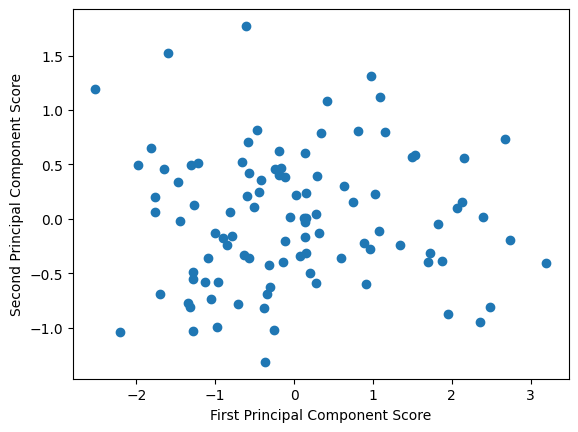

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

It reduces dimensions to 2d and makes it easier to spot outliers.

Cant interpert individual variable values precisely from components.

Misses info from the 3rd PCA.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cardio_path = r"C:\Users\kegem\OneDrive\Datascience Masters\DS (Fall 2024) SEMESTER 1\DX699 O1 Module B AI for Leaders (Fall 2024)\cardio_train.csv"

cardio = pd.read_csv(cardio_path, sep = ';')

cardio['age'] = round(cardio['age']/365)

In [22]:
print(cardio.info())


print(cardio.isnull().sum())

print(cardio.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB
None
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
c

In [23]:
print(cardio.head())


   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


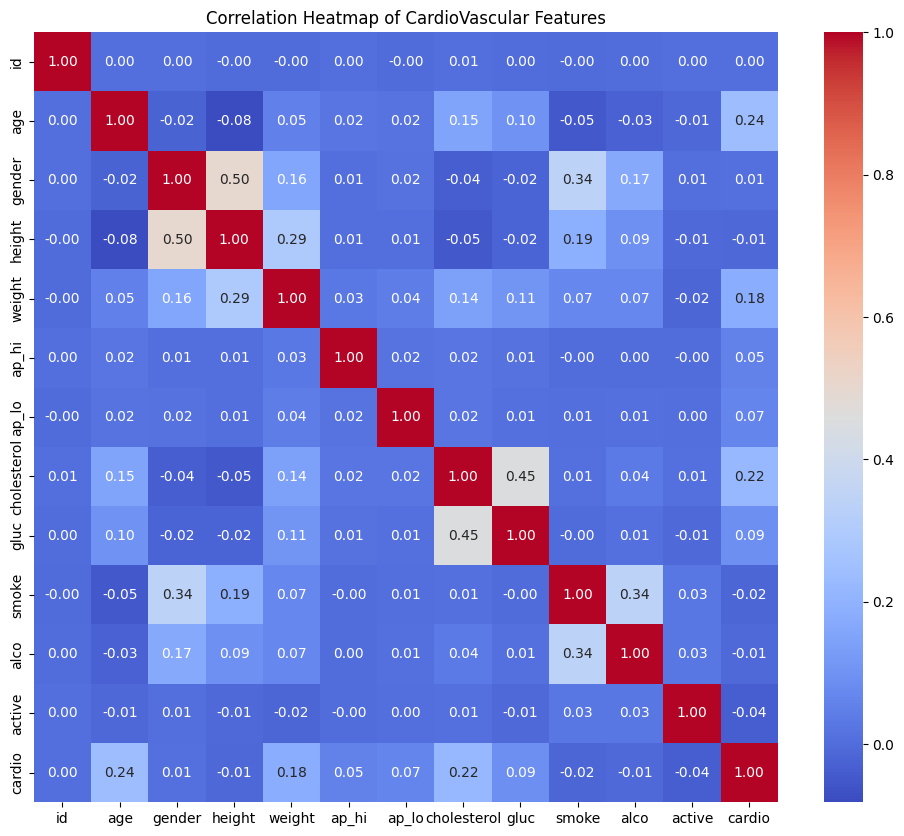

In [24]:
plt.figure(figsize=(12, 10))
corr = cardio.corr()
sns.heatmap(corr, annot =True, cmap = 'coolwarm', fmt= ".2f")
plt.title("Correlation Heatmap of CardioVascular Features")
plt.show()

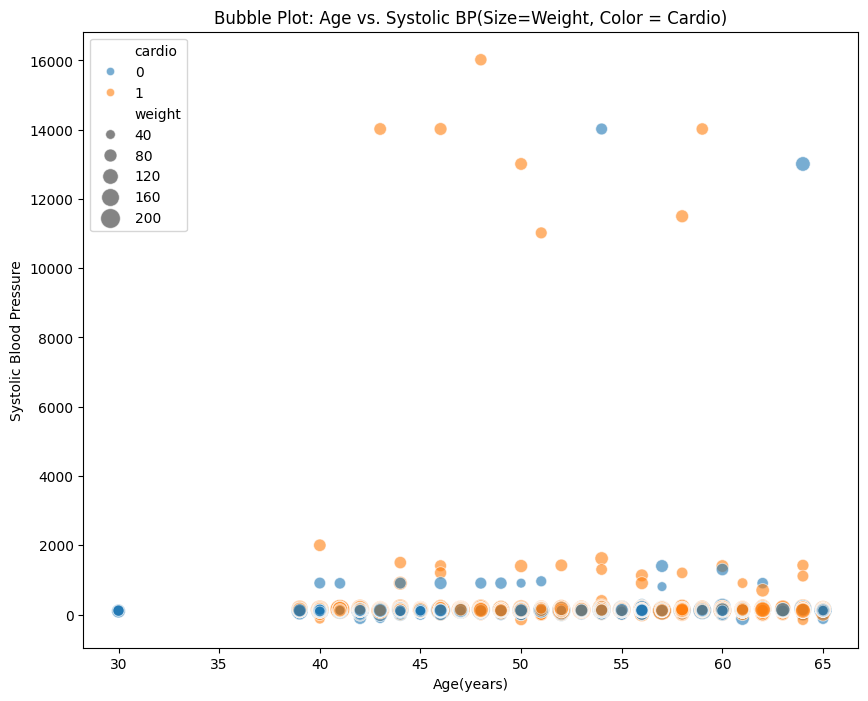

In [32]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cardio, x='age', y = 'ap_hi', size = 'weight', hue = 'cardio', sizes=(20,200), alpha = 0.6)
plt.title("Bubble Plot: Age vs. Systolic BP(Size=Weight, Color = Cardio)")
plt.xlabel("Age(years)")
plt.ylabel("Systolic Blood Pressure")
plt.show()

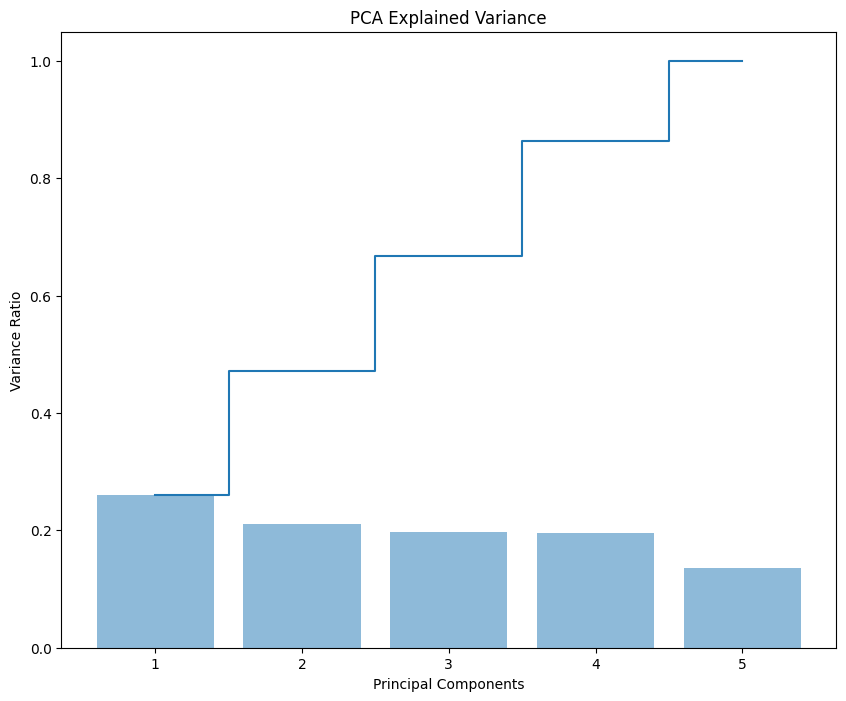

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
X = cardio[numerical_features]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))

evr = pca.explained_variance_ratio_
x= range(1, len(evr)+1)

plt.bar(x, evr, alpha = 0.5, label = 'Individual variance')
plt.step(x, np.cumsum(evr), where = 'mid', label = 'Cumulative variance')

plt.title("PCA Explained Variance")
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#Predict systolic blood pressure
X = cardio[["age", "weight", "height"]]
y = cardio["ap_hi"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R_squared:{r2_score(y_test, y_pred):.3f}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"Coefficients :", dict(zip(X.columns, model.coef_)))


R_squared:0.001
RMSE:174.788
Coefficients : {'age': np.float64(0.4730658406573775), 'weight': np.float64(0.32191107608782515), 'height': np.float64(0.008112652115367065)}


In [ ]:
#Predict Weight
X2 = cardio[["age", "ap_hi", "height"]]
y2 = cardio["weight"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

print(f"R_squared:{r2_score(y_test2, y_pred2):.3f}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test2, y_pred2)):.3f}")
print(f"Coefficients :", dict(zip(X2.columns, model2.coef_)))

R_squared:0.092
RMSE:13.846
Coefficients : {'age': np.float64(0.16789717791221614), 'ap_hi': np.float64(0.0027459382209845673), 'height': np.float64(0.5198743785510225)}


Correlation heatmap:
Height and gender
glucose and cholesterol
gender and smoking
alcohol and smoking
cholesterol and cardio

Have the highest correlations

Bubble Plot(Systolic vs Age):
Whether or not you do cardio does not have much an effect on your systolic blood pressure.
Weight is not havbing as much of an effect on blood pressure as I thought


PCA:
5 components explain 100% of the variance so reducing the dimensionality to 4 whcih would reduce noise and avoid performance degradation

Predicition:
Blood Pressure - r squared 0.001 indicated that age, weight, height, have little to no explanatory power. high rmse means low prediction accuracy. There is a relationshipbetween the features an dtarget variable but arent strong predictors.

Weight - model explains about 9% of variance in the weight which is low. RMSE of 13.846 means this a moderate level of prediction error for weight

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

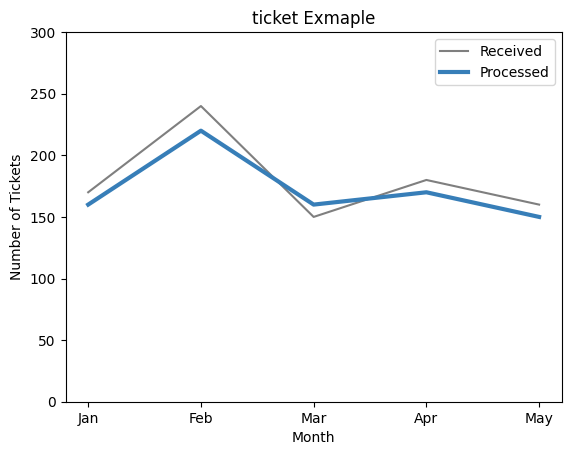

In [33]:
months = ["Jan", 'Feb', 'Mar', 'Apr', 'May']
received = [170, 240, 150, 180, 160]
processed = [160, 220, 160, 170, 150]

plt.plot(months, received, label='Received', color='#7f7f7f')
plt.plot(months, processed, label = 'Processed', color= '#377eb8', linewidth=3)

plt.xlabel("Month")
plt.ylabel("Number of Tickets")
plt.title('ticket Exmaple')
plt.legend()
plt.ylim(0,300)
plt.show()